# Course 2 Final Project: Sales Analysis

## Project Statement
AAL of Australia, established in 2000, is particularly recognised locally for its clothing business. It has stores in numerous locations spanning states, metropolises, tier-1 and tier-2 cities across Australia.

The customer demograpphic starts from kids all the way to the elderly.

With the current surge in business, AAL is actively looking into informed investment opportunities that will lead to corporate expansions.

Available data are derived AAL's fourth quarter sales in Australia.

## Data Wrangling


In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset
df = pd.read_csv("AusApparalSales4thQrt2020.csv", parse_dates=['Date'])
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [3]:
# Check column data types
df.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [4]:
# Check for missing or incorrect data
print("Total Missing Values:")
print(df.isna().sum().to_string())
print("\nTotal Values:")
print(df.notna().sum().to_string())

Total Missing Values:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0

Total Values:
Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560


In [5]:
# Add transformed date columns
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.dayofweek # Mon == 0...
df['week_no'] = df['Date'].dt.isocalendar().week
df['monthStart'] = df['Date'].dt.is_month_start 
df['monthEnd'] = df['Date'].dt.is_month_end

df.head()

,Date,Time,State,Group,Unit,Sales,month,day,day_of_week,week_no,monthStart,monthEnd
0,2020-10-01,Morning,WA,Kids,8,20000,10,1,3,40,True,False
1,2020-10-01,Morning,WA,Men,8,20000,10,1,3,40,True,False
2,2020-10-01,Morning,WA,Women,4,10000,10,1,3,40,True,False
3,2020-10-01,Morning,WA,Seniors,15,37500,10,1,3,40,True,False
4,2020-10-01,Afternoon,WA,Kids,3,7500,10,1,3,40,True,False


In [6]:
# Convert to categorical columns
df['State'] = df['State'].astype("category")
df['Time'] = df['Time'].astype('category')
df['Group'] = df['Group'].astype('category')

In [7]:
# Check data distribution
df.describe()

,Date,Unit,Sales,month,day,day_of_week,week_no
count,7560,7560.000000,7560.000000,7560.000000,7560.000000,7560.000000,7560.0
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201,11.000000,15.500000,2.977778,46.455556
min,2020-10-01 00:00:00,2.000000,5000.000000,10.000000,1.000000,0.000000,40.0
25%,2020-10-23 00:00:00,8.000000,20000.000000,10.000000,8.000000,1.000000,43.0
50%,2020-11-15 12:00:00,14.000000,35000.000000,11.000000,15.500000,3.000000,46.5
75%,2020-12-08 00:00:00,26.000000,65000.000000,12.000000,23.000000,5.000000,50.0
max,2020-12-30 00:00:00,65.000000,162500.000000,12.000000,30.000000,6.000000,53.0
std,NaN,12.901403,32253.506944,0.816551,8.656014,2.000009,3.786662


Due to the spread of the data, it will be easier to normalize the numerical data columns "Unit" and "Sales"

In [8]:
# Normalize Unit and Sales columns for ease of processing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["Unit","Sales"]] = scaler.fit_transform(df[["Unit","Sales"]])
df.head()

,Date,Time,State,Group,Unit,Sales,month,day,day_of_week,week_no,monthStart,monthEnd
0,2020-10-01,Morning,WA,Kids,0.095238,0.095238,10,1,3,40,True,False
1,2020-10-01,Morning,WA,Men,0.095238,0.095238,10,1,3,40,True,False
2,2020-10-01,Morning,WA,Women,0.031746,0.031746,10,1,3,40,True,False
3,2020-10-01,Morning,WA,Seniors,0.206349,0.206349,10,1,3,40,True,False
4,2020-10-01,Afternoon,WA,Kids,0.015873,0.015873,10,1,3,40,True,False


In [9]:
# Drop unnecessary 'Date' column from further processing
df.drop('Date', axis=1)

,Time,State,Group,Unit,Sales,month,day,day_of_week,week_no,monthStart,monthEnd
0,Morning,WA,Kids,0.095238,0.095238,10,1,3,40,True,False
1,Morning,WA,Men,0.095238,0.095238,10,1,3,40,True,False
2,Morning,WA,Women,0.031746,0.031746,10,1,3,40,True,False
3,Morning,WA,Seniors,0.206349,0.206349,10,1,3,40,True,False
4,Afternoon,WA,Kids,0.015873,0.015873,10,1,3,40,True,False
...,...,...,...,...,...,...,...,...,...,...,...
7555,Afternoon,TAS,Seniors,0.190476,0.190476,12,30,2,53,False,False
7556,Evening,TAS,Kids,0.206349,0.206349,12,30,2,53,False,False
7557,Evening,TAS,Men,0.206349,0.206349,12,30,2,53,False,False
7558,Evening,TAS,Women,0.142857,0.142857,12,30,2,53,False,False


### Group Data for Review

Check the number of distinct regions

In [10]:
# Extract distinct states and Group
print(df["State"].unique())
print(df["Group"].unique())

[' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS']
Categories (7, object): [' NSW', ' NT', ' QLD', ' SA', ' TAS', ' VIC', ' WA']
[' Kids', ' Men', ' Women', ' Seniors']
Categories (4, object): [' Kids', ' Men', ' Seniors', ' Women']


In [11]:
# Count the total number of records for each day and time of month. All
# should total (3 months * 7 States * 4 Groups = 84, 31st have been excluded)
df1 = df[["day",'Time']] \
    .groupby(['day','Time'], observed=True) \
    .size() \
    .reset_index(name='counts')
df1.head()

,day,Time,counts
0,1,Afternoon,84
1,1,Evening,84
2,1,Morning,84
3,2,Afternoon,84
4,2,Evening,84


In [12]:
# check if there are any rows with less than 84
df1[df1['counts'] < 84] 

,day,Time,counts


In [13]:
# check if any period with more than 84 records
df1[df1['counts'] > 84]

,day,Time,counts


There does not appear to be any missing values so "chunking" of data will be the standard going forward

## Data Analysis and Visualizations

### General Descriptive Statistical Analysis on Sales

In [14]:
daySalesRaw = df[["day","Time","Sales"]]
daySalesRaw

,day,Time,Sales
0,1,Morning,0.095238
1,1,Morning,0.095238
2,1,Morning,0.031746
3,1,Morning,0.206349
4,1,Afternoon,0.015873
...,...,...,...
7555,30,Afternoon,0.190476
7556,30,Evening,0.206349
7557,30,Evening,0.206349
7558,30,Evening,0.142857


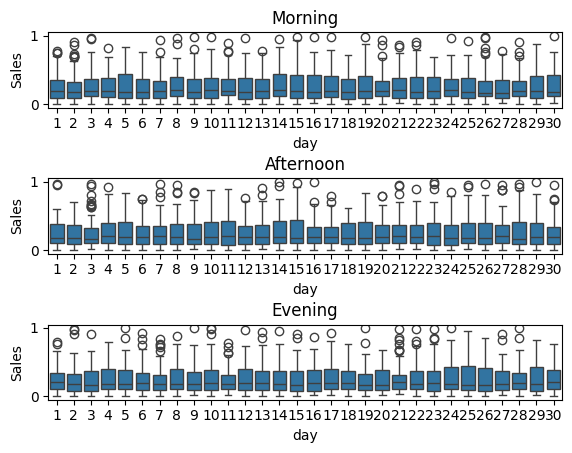

In [15]:
# plot distribution by day

def plotDayTime(time, ax):
    plot = sns.boxplot(
        daySalesRaw[daySalesRaw['Time'].str.contains(time)], 
        x='day',
        y='Sales',
        ax=ax
    )
    ax.title.set_text(time)
    return plot


fig, ax = plt.subplots(3,1)
fig.tight_layout(pad=3.0)
morning = plotDayTime('Morning', ax[0])
afternoon = plotDayTime('Afternoon', ax[1])
evening = plotDayTime('Evening', ax[2])

fig.show()


In [16]:
# Pre-Process data
daySales = daySalesRaw \
    .groupby(["day","Time"], observed=True) \
    .sum() \
    .reset_index() \
    .pivot(index=["day"], columns=["Time"], values="Sales")

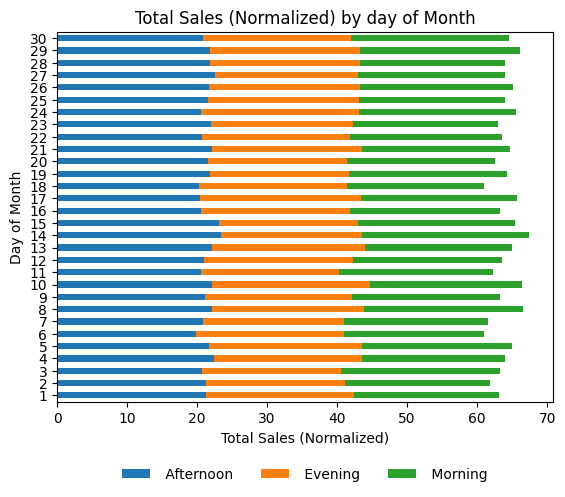

In [17]:
# plot by day of month
dayPlt = daySales.plot(kind="barh", stacked=True)

# Add labels for x & y axis
plt.ylabel("Day of Month")
plt.xlabel("Total Sales (Normalized)")

# title of plot
plt.title("Total Sales (Normalized) by day of Month")
plt.xticks(rotation=0, ha="center")

# move legend to outside of box
sns.move_legend(
    dayPlt, 
    "lower center",
    bbox_to_anchor=(.5,-0.25),
    ncol=3, 
    title=None,
    frameon=False
)
plt.show()

### Sales by Day of Week

In [18]:
# Get weekly sales by day of week
weekLbls = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weeklySalesRaw = df[["week_no","day_of_week","Group","State","Sales"]]

#### By Group

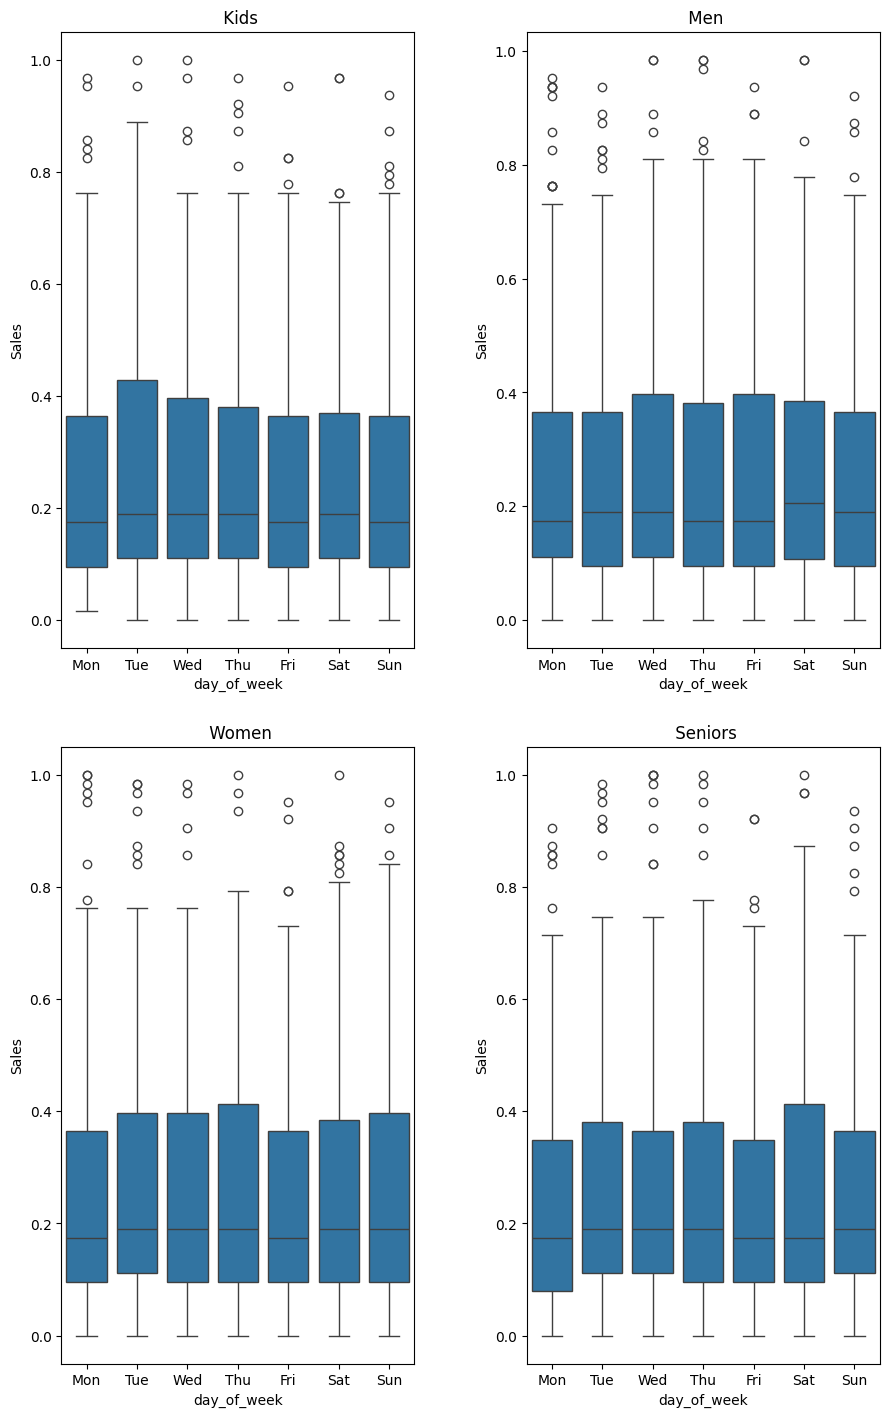

In [19]:
# plot distribution by day of week
import math
def plotWeeklyGroup(group, ax):
    plot = sns.boxplot(
        weeklySalesRaw[weeklySalesRaw['Group'].str.contains(group)], 
        x='day_of_week',
        y='Sales',
        ax=ax
    )
    ax.set_xticks(range(7), weekLbls)
    ax.title.set_text(group)
    return plot

groups = weeklySalesRaw["Group"].unique()

fig, ax = plt.subplots(2,2, figsize=(10,15))
fig.tight_layout(pad=5.0)
for idx, grp in enumerate(groups):
    plotWeeklyGroup(grp, ax[math.floor(idx/2),math.floor(idx%2)])
    
fig.show()

In [20]:
# Pre-Process data for day of week
weeklySalesByDay = weeklySalesRaw.drop("State", axis=1) \
    .groupby(["day_of_week","Group"], observed=True) \
    .sum() \
    .reset_index() \
    .pivot(index=["day_of_week"], columns=["Group"], values="Sales")

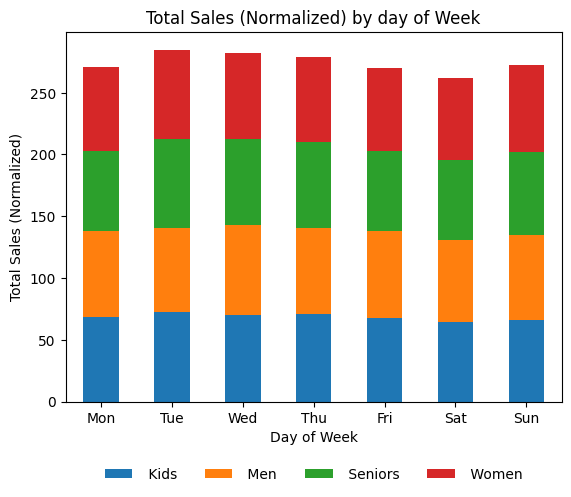

In [21]:
# plot by day of week 
wsPlot = weeklySalesByDay.plot(kind="bar", stacked=True)

# Add labels for x & y axis
plt.xlabel("Day of Week")
plt.ylabel("Total Sales (Normalized)")

# title of plot
plt.title("Total Sales (Normalized) by day of Week")
plt.xticks(range(7), labels=weekLbls, rotation=0, ha="center")

# move legend to outside of box
sns.move_legend(
    wsPlot, 
    "lower center",
    bbox_to_anchor=(.5,-0.25),
    ncol=4, 
    title=None,
    frameon=False
)

plt.show()

#### By State

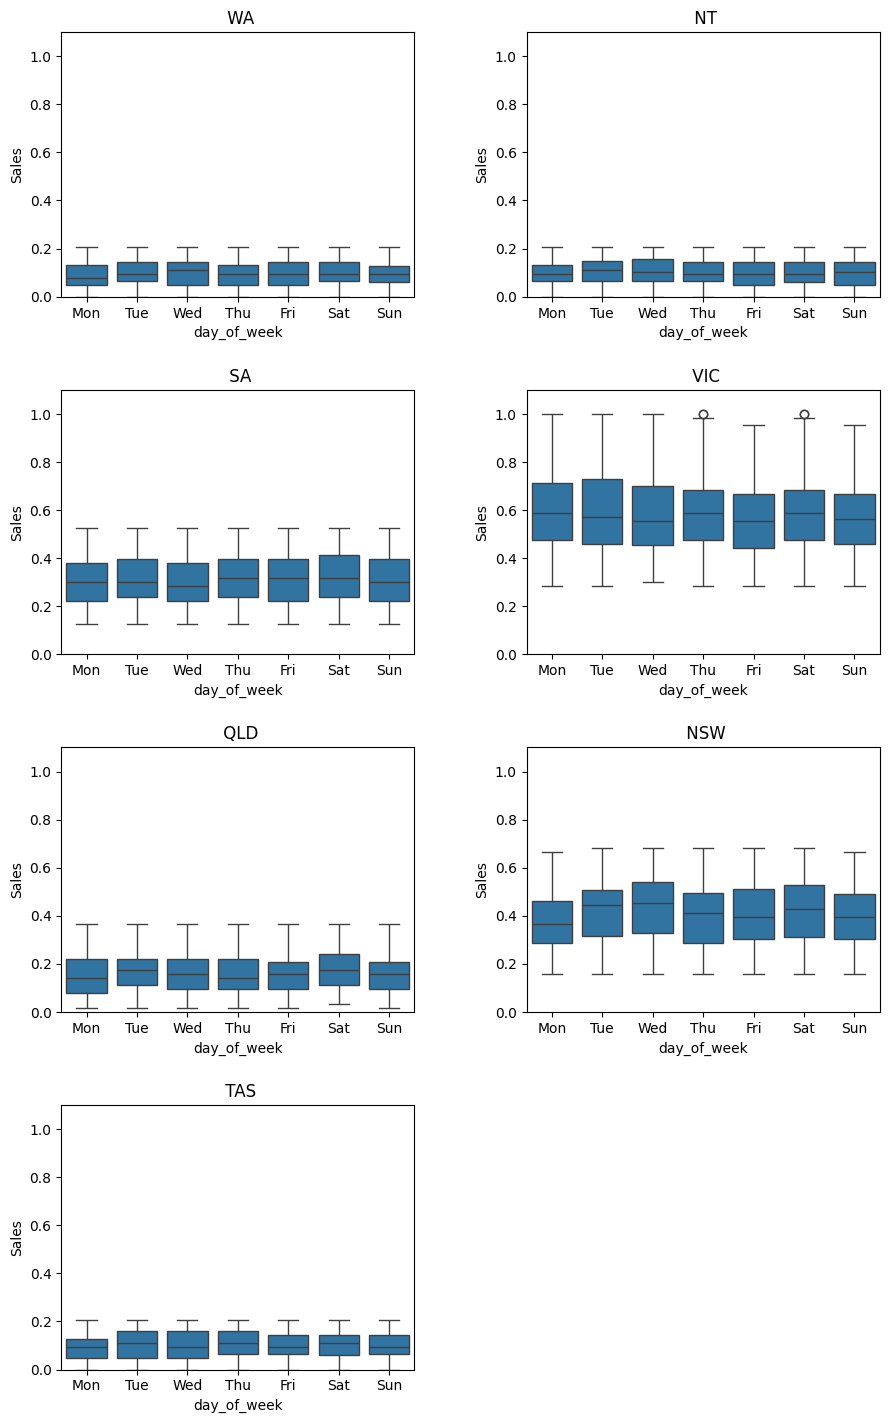

In [34]:
def plotWeeklyState(group, ax):
    plot = sns.boxplot(
        weeklySalesRaw[weeklySalesRaw['State'].str.contains(group)], 
        x='day_of_week',
        y='Sales',
        ax=ax
    )
    ax.set_xticks(range(7), weekLbls)
    ax.title.set_text(group)
    return plot

states = weeklySalesRaw["State"].unique()

fig, ax = plt.subplots(
    math.ceil(len(states)/2),
    2, 
    figsize=(10,15)
)
ax[-1,-1].set_visible(False)
plt.setp(ax, ylim=(0,1.1))
fig.tight_layout(pad=5.0)
for idx, state in enumerate(states):
    plotWeeklyState(state, ax[math.floor(idx/2),math.floor(idx%2)])
    
fig.show()

In [35]:
# Pre-Process data for day of week
weeklySalesByDayStt = weeklySalesRaw.drop("Group", axis=1) \
    .groupby(["day_of_week","State"], observed=True) \
    .sum() \
    .reset_index() \
    .pivot(index=["day_of_week"], columns=["State"], values="Sales")

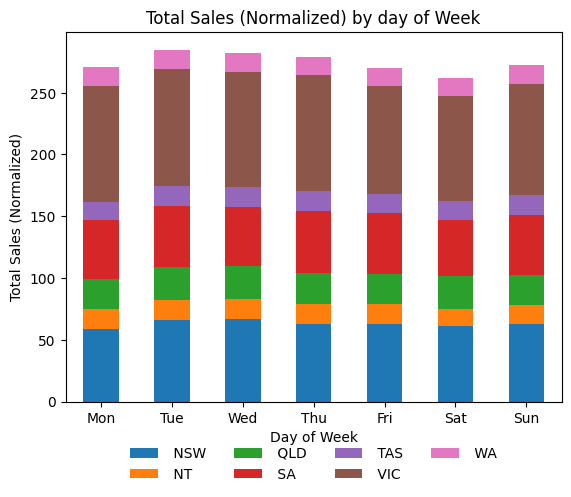

In [36]:
# plot by day of week 
wsPlot = weeklySalesByDayStt.plot(kind="bar", stacked=True)

# Add labels for x & y axis
plt.xlabel("Day of Week")
plt.ylabel("Total Sales (Normalized)")

# title of plot
plt.title("Total Sales (Normalized) by day of Week")
plt.xticks(range(7), labels=weekLbls, rotation=0, ha="center")

# move legend to outside of box
sns.move_legend(
    wsPlot, 
    "lower center",
    bbox_to_anchor=(.5,-0.25),
    ncol=4, 
    title=None,
    frameon=False
)

plt.show()

### Sales by Week

#### By Group

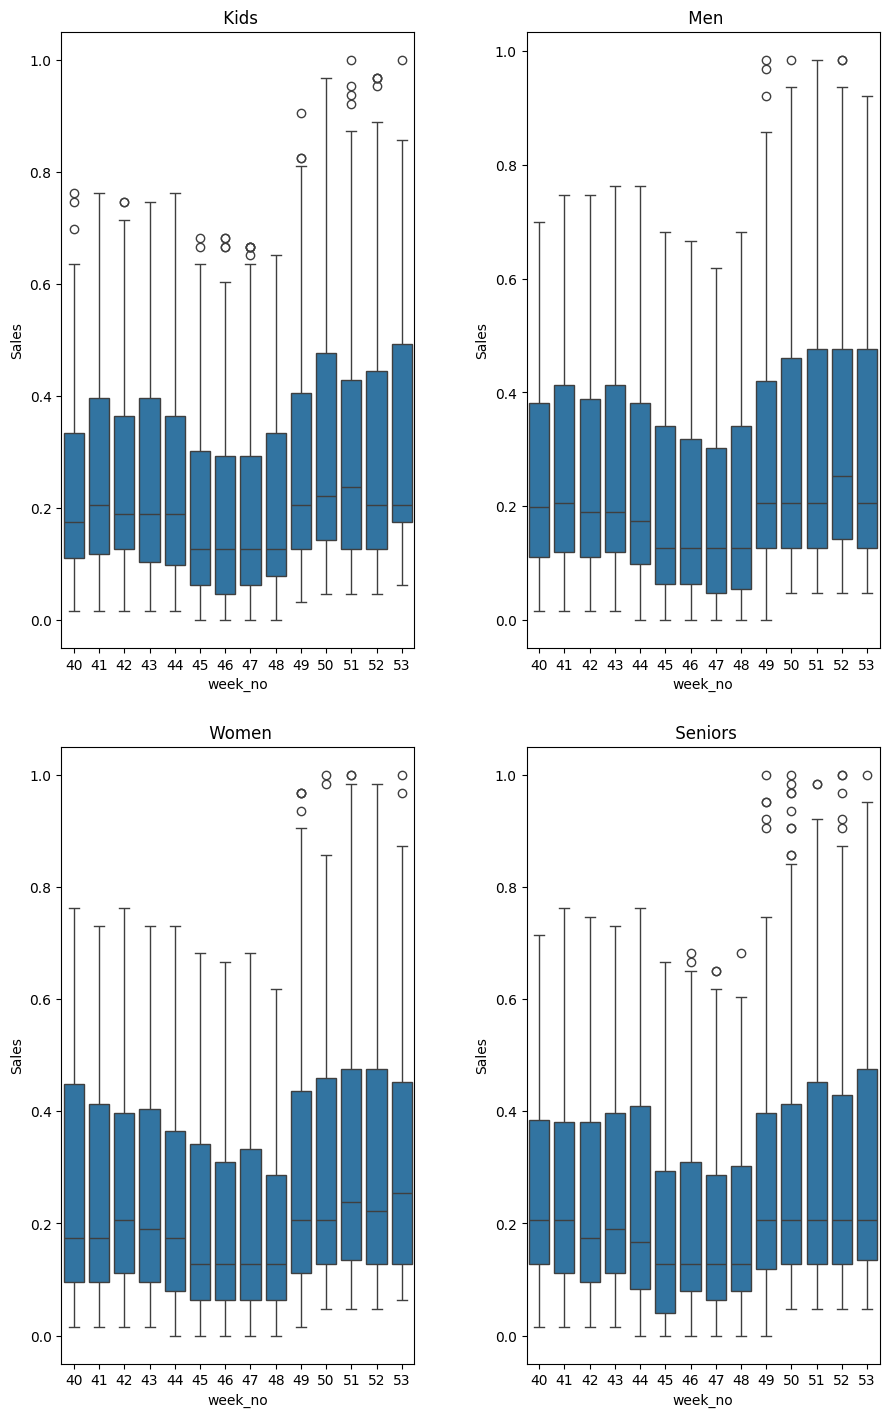

In [39]:
# plot distribution by week
def plotWeekGroup(group, ax):
    plot = sns.boxplot(
        weeklySalesRaw[weeklySalesRaw['Group'].str.contains(group)], 
        x='week_no',
        y='Sales',
        ax=ax
    )
    ax.title.set_text(group)
    return plot

groups = weeklySalesRaw["Group"].unique()

fig, ax = plt.subplots(2,2, figsize=(10,15))
fig.tight_layout(pad=5.0)
for idx, grp in enumerate(groups):
    plotWeekGroup(grp, ax[math.floor(idx/2),math.floor(idx%2)])
    
fig.show()

In [42]:
# Pre-Process data for week number
weeklySales = weeklySalesRaw.drop("State", axis=1) \
    .groupby(["week_no","Group"], observed=True) \
    .sum() \
    .reset_index() \
    .pivot(index=["week_no"], columns=["Group"], values="Sales")

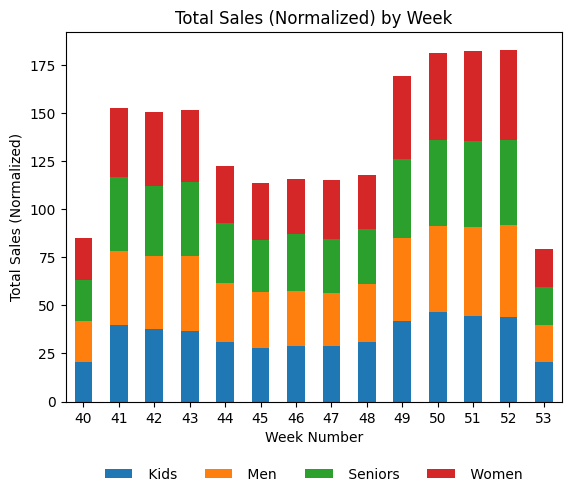

In [43]:
# plot by day of week
wsPlot = weeklySales.plot(kind="bar", stacked=True)

# Add labels for x & y axis
plt.xlabel("Week Number")
plt.ylabel("Total Sales (Normalized)")

# title of plot
plt.title("Total Sales (Normalized) by Week")
plt.xticks(rotation=0, ha="center")

# move legend to outside of box
sns.move_legend(
    wsPlot, 
    "lower center",
    bbox_to_anchor=(.5,-0.25),
    ncol=4, 
    title=None,
    frameon=False
)

plt.show()

#### By State

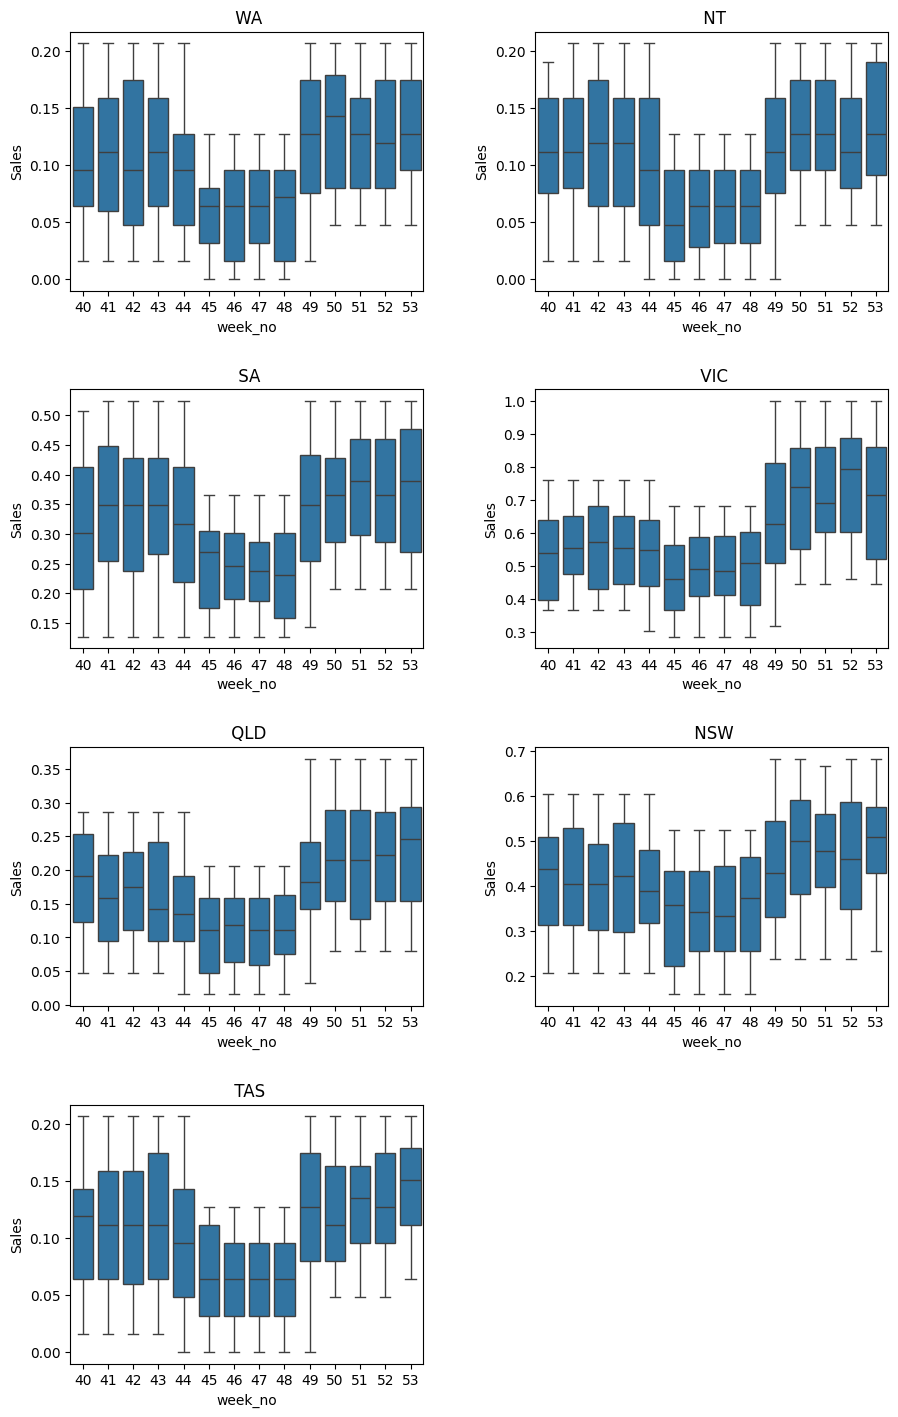

In [45]:
# plot distribution by week
def plotWeekState(state, ax):
    plot = sns.boxplot(
        weeklySalesRaw[weeklySalesRaw['State'].str.contains(state)], 
        x='week_no',
        y='Sales',
        ax=ax
    )
    ax.title.set_text(state)
    return plot

fig, ax = plt.subplots(math.ceil(len(states)/2),2, figsize=(10,15))
ax[-1,-1].set_visible(False)
fig.tight_layout(pad=5.0)
for idx, state in enumerate(states):
    plotWeekState(state, ax[math.floor(idx/2),math.floor(idx%2)])
    
fig.show()

In [46]:
# Pre-Process data for week number
weeklySalesStt = weeklySalesRaw.drop("Group", axis=1) \
    .groupby(["week_no","State"], observed=True) \
    .sum() \
    .reset_index() \
    .pivot(index=["week_no"], columns=["State"], values="Sales")

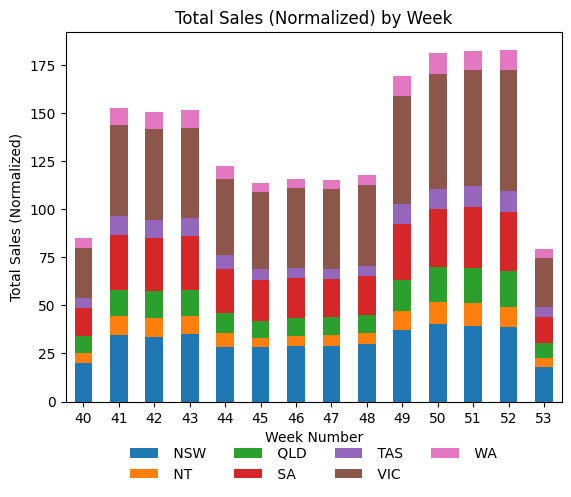

In [47]:
# plot by week
wssPlot = weeklySalesStt.plot(kind="bar", stacked=True)

# Add labels for x & y axis
plt.xlabel("Week Number")
plt.ylabel("Total Sales (Normalized)")

# title of plot
plt.title("Total Sales (Normalized) by Week")
plt.xticks(rotation=0, ha="center")

# move legend to outside of box
sns.move_legend(
    wssPlot, 
    "lower center",
    bbox_to_anchor=(.5,-0.25),
    ncol=4, 
    title=None,
    frameon=False
)

plt.show()

### Sales by Month

#### By Group

In [48]:
# Get monthly sales
monthlySalesRaw = df[["month","Group","State","Sales"]]

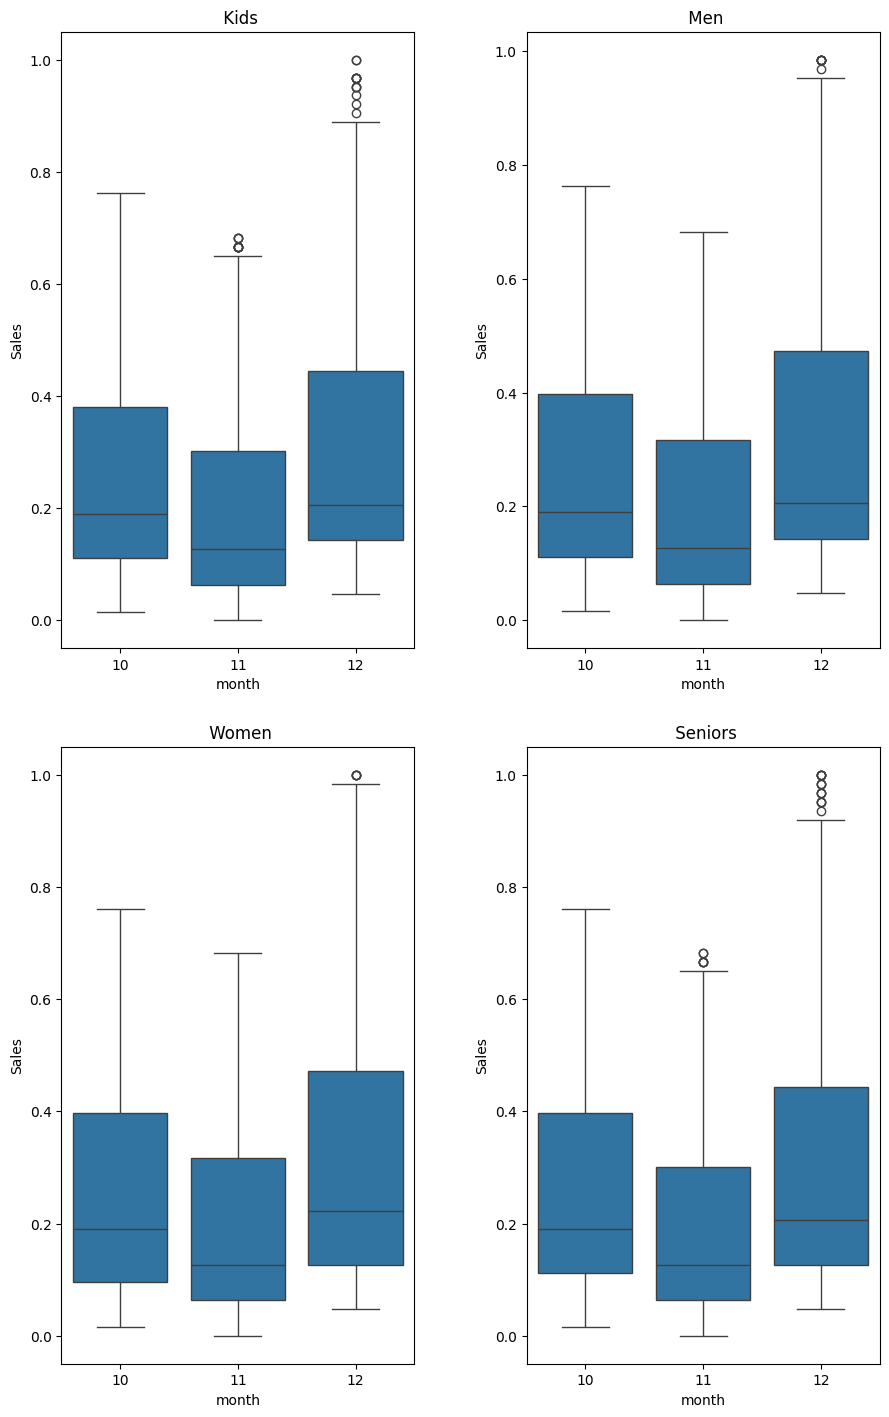

In [49]:
# plot distribution by week
def plotMonthGroup(group, ax):
    plot = sns.boxplot(
        monthlySalesRaw[monthlySalesRaw['Group'].str.contains(group)], 
        x='month',
        y='Sales',
        ax=ax
    )
    ax.title.set_text(group)
    return plot

groups = monthlySalesRaw["Group"].unique()

fig, ax = plt.subplots(2,2, figsize=(10,15))
fig.tight_layout(pad=5.0)
for idx, grp in enumerate(groups):
    plotMonthGroup(grp, ax[math.floor(idx/2),math.floor(idx%2)])
    
fig.show()

In [50]:
# Pre-Process data for week number
monthlySales = monthlySalesRaw.drop("State", axis=1) \
    .groupby(["month","Group"], observed=True) \
    .sum() \
    .reset_index() \
    .pivot(index=["month"], columns=["Group"], values="Sales")

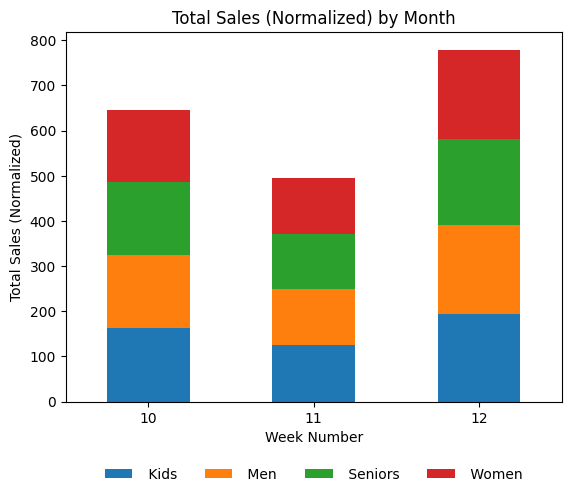

In [51]:
# plot by month
msPlot = monthlySales.plot(kind="bar", stacked=True)

# Add labels for x & y axis
plt.xlabel("Week Number")
plt.ylabel("Total Sales (Normalized)")

# title of plot
plt.title("Total Sales (Normalized) by Month")
plt.xticks(rotation=0, ha="center")

# move legend to outside of box
sns.move_legend(
    msPlot, 
    "lower center",
    bbox_to_anchor=(.5,-0.25),
    ncol=4, 
    title=None,
    frameon=False
)

plt.show()

#### By State

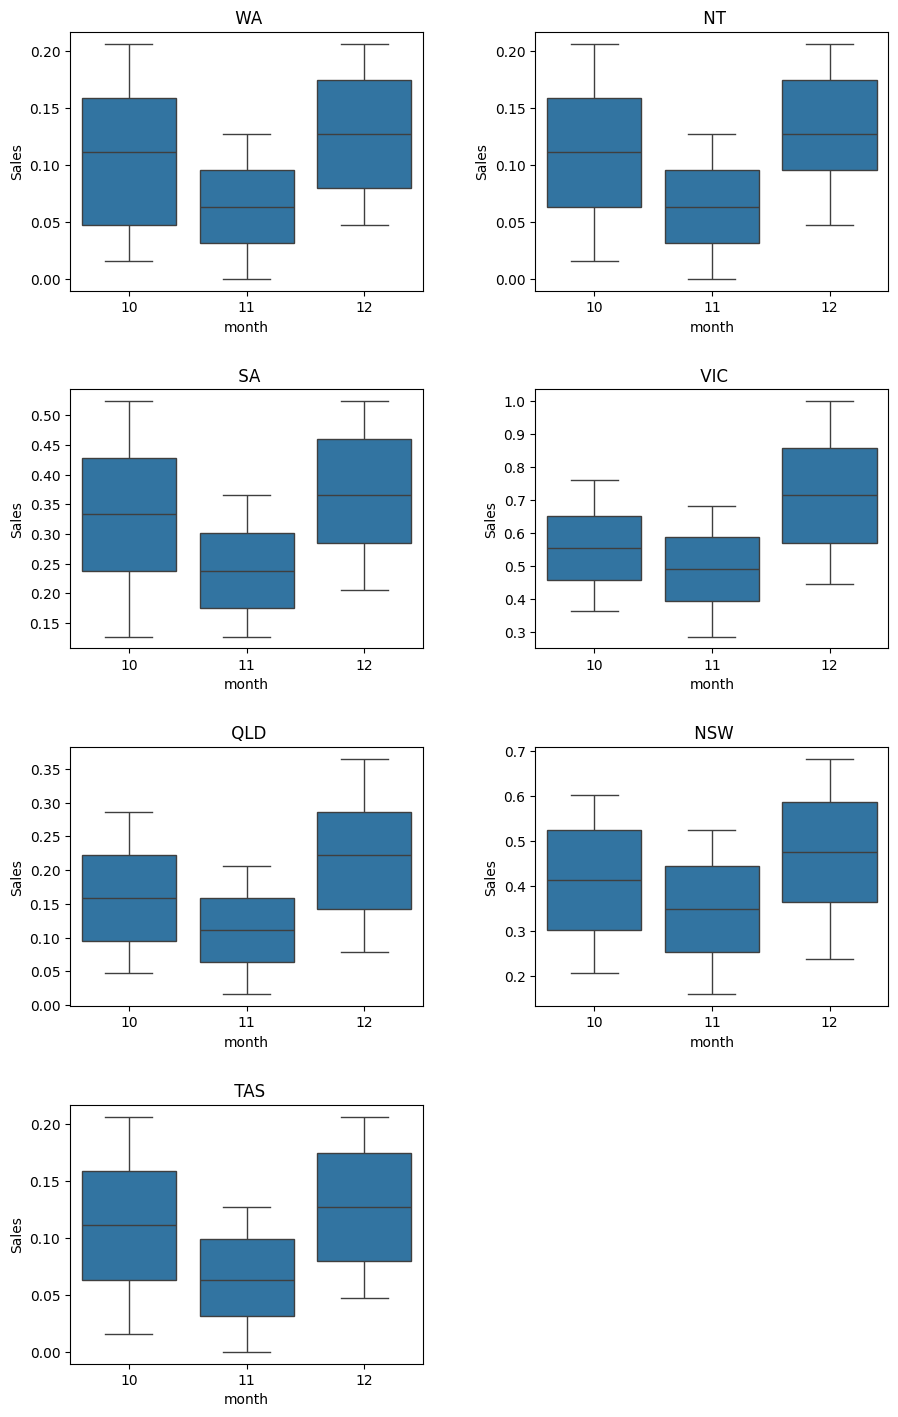

In [53]:
# plot distribution by week
def plotMonthState(state, ax):
    plot = sns.boxplot(
        monthlySalesRaw[monthlySalesRaw['State'].str.contains(state)], 
        x='month',
        y='Sales',
        ax=ax
    )
    ax.title.set_text(state)
    return plot

fig, ax = plt.subplots(math.ceil(len(states)/2),2, figsize=(10,15))
ax[-1,-1].set_visible(False)
fig.tight_layout(pad=5.0)
for idx, state in enumerate(states):
    plotMonthState(state, ax[math.floor(idx/2),math.floor(idx%2)])
    
fig.show()

In [54]:
# Pre-Process data for week number
monthlySalesSTT = monthlySalesRaw.drop("Group", axis=1) \
    .groupby(["month","State"], observed=True) \
    .sum() \
    .reset_index() \
    .pivot(index=["month"], columns=["State"], values="Sales")

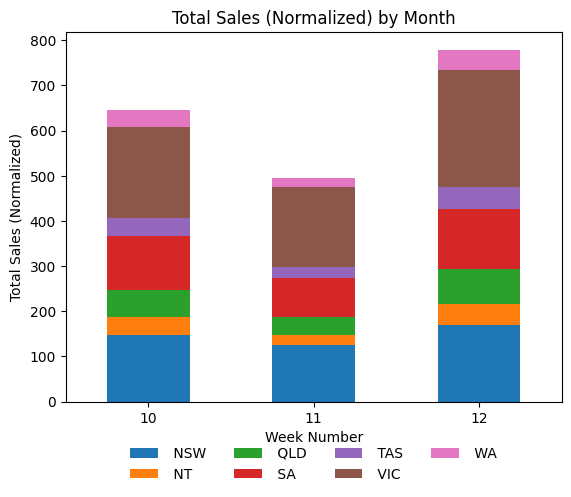

In [56]:
# plot by month
mssPlot = monthlySalesSTT.plot(kind="bar", stacked=True)

# Add labels for x & y axis
plt.xlabel("Week Number")
plt.ylabel("Total Sales (Normalized)")

# title of plot
plt.title("Total Sales (Normalized) by Month")
plt.xticks(rotation=0, ha="center")

# move legend to outside of box
sns.move_legend(
    mssPlot, 
    "lower center",
    bbox_to_anchor=(.5,-0.25),
    ncol=4, 
    title=None,
    frameon=False
)

plt.show()

### Quarterly Sales

In [ ]:
# Generate weekly, monthly and quarterly reports

In [ ]:
# Find Group with the highest and lowest sales

## Data Visualization

Dashboard should contain daily, weekly, monthly and quarterly charts

In [ ]:
# State-wise sales analysis for different demographics (kids, women, men and seniors)

In [ ]:
# Group-wise sales analysis (kids, women, men and seniors) across states